In [41]:
import numpy as np
np.set_printoptions(threshold=np.nan)
from sklearn.datasets import fetch_mldata
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# changing labels to make one vs all

def change_label(which_class,y_train,y_test):

    samples_train = y_train.shape[1]
    samples_test = y_test.shape[1]
    
    new_labels_train = np.zeros((1,samples_train ))
    new_labels_test = np.zeros((1,samples_test))

    ind_row_tr, ind_col_tr = np.where(y_train == which_class)
    ind_row_tst, ind_col_tst = np.where(y_test== which_class)
    
    new_labels_train[ind_row_tr,ind_col_tr] = 1
    new_labels_test[ind_row_tst,ind_col_tst] = 1
    
    return new_labels_train, new_labels_test
    
    

In [3]:
#Data preparation

def data_preparation(X,Y):
    
    X_binary = X[np.any([y == 1,y == 2, y==3], axis = 0)]
    y_binary = y[np.any([y == 1,y == 2, y==3], axis = 0)]
    shuffle_index = np.random.permutation(X_binary.shape[0])
    X_binary_shuffled, y_binary_shuffled = X_binary[shuffle_index], y_binary[shuffle_index]
    
    train_proportion = 0.8
    train_test_cut = int(len(X_binary)*train_proportion)
    
    #sufle create new data set
    X_train, X_test, y_train, y_test = \
    X_binary_shuffled[:train_test_cut], \
    X_binary_shuffled[train_test_cut:], \
    y_binary_shuffled[:train_test_cut], \
    y_binary_shuffled[train_test_cut:]
    
    #normalize
    X_train_normalised= X_train/255.0
    X_test_normalised = X_test/255.0
    
    #reshape -> feature in rows and label in collumn
    X_train_tr = X_train_normalised.transpose()
    y_train_tr = y_train.reshape(1,y_train.shape[0])
    X_test_tr = X_test_normalised.transpose()
    y_test_tr = y_test.reshape(1,y_test.shape[0])
    
    #change labels from 1-2 to 0-1
#     y_train_shifted = y_train_tr - 1
#     print(y_binary.shape)
#     y_test_shifted = y_test_tr - 1
#     print("Shape of X_train is", X_train.shape)
#     print("Shape of X_test is", X_test.shape)
#     print("Shape of y_train is", y_train.shape)
#     print("Shape of y_test is", y_test.shape)
    
#     print(X_train_tr.shape)
#     print(y_train_tr.shape)
#     print(X_test_tr.shape)
#     print(y_test_tr.shape)

    
    return (X_train_tr,X_test_tr,y_train_tr,y_test_tr)
    #for i in range(10):
        #print ("digit", i, "appear", np.count_nonzero(y == i), "times")
       


In [4]:
# plot image 
def plot_image(this_digit):
    some_digit_image = this_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()

In [5]:
#create sigmoid function

def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    return s

In [6]:
#initialize values of thetas and bias

def initialize_parameters(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [7]:
#implement cost function and its gradient propagation
def cost_function(w, b, X, Y):

    m = X.shape[1] #quantity of samples
    
    z = np.dot(w.T,X)+b #hipotese without sigmoid
    A = sigmoid(z) # applying hipotese on sigmoid, A is the result of sigmoid for each sample
    cost = -1.0/m*np.sum(Y*np.log(A)+(1.0-Y)*np.log(1.0-A)) #find cost values for all samples
    dw = 1.0/m*np.dot(X, (A-Y).T) #find residual of weights
    db = 1.0/m*np.sum(A-Y) # find residual of bias
    cost = np.squeeze(cost)
    
    return dw,db, cost

In [8]:
#apply gradient descent

def gradient_descent(w,b,X,Y,num_iterations,alpha, print_cost):
    cost_array = []
    for i in range(num_iterations):
        #call cost function
        dw,db,cost = cost_function(w,b,X,Y)
        # update weights and bias
        w = w - alpha*dw
        b = b - alpha*db
        
        #save cost
        cost_array.append(cost)
        
        if print_cost == True:
            print("Cost from iteration ",i,"= ",cost,"\n")
            
    return w,b,cost_array
        

In [9]:
#prediction

def prediction (w,b,X,threshold):
    samples = X.shape[1]
    Y_prediction = np.zeros((1,samples))
    w = w.reshape(X.shape[0],1)
    A = sigmoid (np.dot(w.T, X)+b)
#     for i in range(A.shape[1]):
#         if (A[:,i] > threshold): 
#             Y_prediction[:, i] = 1
#         elif (A[:,i] <= threshold):
#             Y_prediction[:, i] = 0
    return A

In [10]:
# one vs all prediction

def one_vs_all(w,X):
    samples = X.shape[1]
    weighs_qut = w.shape[0]
    bias = w[-1]
    weights = w[:(len(w))-1]
    A = sigmoid (np.dot(weights.T, X)+bias)
    
    return A;
   
    
    


(4402, 1)
(4402, 1)
95.27487505679237


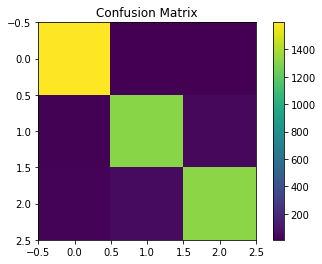

In [78]:
mnist  =  fetch_mldata('MNIST original')
X,y = mnist["data"], mnist["target"]
threshold = 0.5
num_classes = 3
num_iterations = 100000
alpha = 0.0005
X_train,X_test,y_train,y_test = data_preparation(X,y)

i = 1;
j = 1;
dim_train = X_train.shape[0]
dim_test = X_test.shape[1]

# weights = [None]*num_classes
# biases = [None]*num_classes

classifiers = {} #dicionarios de classificadores treinados
#probabilities = np.zeros((num_classes,dim_test))
probabilities = []
while i <=3:
    new_label_train, new_label_test = change_label(i,y_train,y_test)
    ws, bs = initialize_parameters(dim_train)
    
    w,b,costs = gradient_descent(ws,bs,X_train,new_label_train,num_iterations,alpha,False) # pesos e bias treinados
    treined_parameters = (np.append(w,b)).reshape(dim_train+1,1)  # concatenate weights
    classifiers.update({i:treined_parameters})
    i = i+1

    
#compute probabilities for each class
while j <=3:
    
    prob = one_vs_all(classifiers.get(j),X_test)
    #probabilities[:][:j] = prob
    probabilities.append(prob)
    j = j+1

#max_value = np.max(probabilities,axis=1)
# print(max_value)
k = 0
aux_array = np.zeros(num_classes)
prediction_array = []
y = np.ndarray.tolist(y_test)
while k <= dim_test-1:
    aux_array[0] = probabilities[0][0][k]
    aux_array[1] = probabilities[1][0][k]
    aux_array[2] = probabilities[2][0][k]
    k = k+1
    max_value = np.max(aux_array)
    indx = np.asscalar((np.where(aux_array == max_value))[0])
    prediction_array.append(indx+1)
    
    
#final = accuracy_score(y_test, prediction_array,normalize = True)

final = (np.asarray(prediction_array)).reshape((dim_test,1))
y_test = y_test.T
print(y_test.shape)
print(final.shape)

#computer test prediction

    #print(w)
    #print(b)
    
#     weights[i-1] = w
#     biases[i-1] = b
    
   # Y_prediction_test = predict (w, b, X_test)
#     prob = np.ndarray.tolist(prediction (w, b, X_train,threshold))
#     probabilities.append(prob)
    
    #train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-new_label_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(final-y_test)*100.0)
print(test_accuracy)
    #print("vector class: ", i, " ",new_label_train)
    
classes_names = ['1','2','3']
cnf_matrix = confusion_matrix(y_test,final)
plt.imshow(cnf_matrix)
plt.title("Confusion Matrix")
plt.colorbar()


   


#print ("Accuracy Train: ", train_accuracy)    

#print ("Info Gerais: ", d)
#print ("Accuarcy Test: ",  test_accuracy)
